In [19]:
import torch
from Model.complete_model import CVSeaNet
from Dataset.CustomDataset_csk import MS3Dataset_CSK
from Dataset.CustomDataset_sen import MS3Dataset_SEN
from torch.utils.data import ConcatDataset
import matplotlib.pyplot as plt

In [20]:
path_state = r"/media/warmachine/Seagate Expansion Drive/DATASET_MMMF/folder_to_work_on/tb_logs/fist_training_v0/version_11/checkpoints/epoch=64-step=134160.ckpt"
state = torch.load(path_state)

In [21]:
state['hyper_parameters'], state['state_dict']

({'in_channels': 1,
  'in_res': 2048,
  'backbone_type_id': 0,
  'backbone_architecture': [16,
   (1, 8, 3, 1, 1),
   (6, 12, 3, 2, 1),
   (6, 12, 3, 1, 1),
   (6, 20, 5, 2, 1),
   (6, 20, 5, 1, 1),
   (6, 40, 3, 2, 1),
   (6, 40, 3, 1, 2),
   (6, 56, 5, 1, 3),
   (6, 96, 5, 2, 1),
   (6, 96, 5, 1, 3),
   (6, 160, 3, 1, 1)],
  'score_threshold': 0.5,
  'real_conv_block': False,
  'data_fusion': False,
  'early_data_fusion': False,
  'late_data_fusion': False,
  'data_fusion_mode': 'cat',
  'weight_alpha_Focloss': 0.9,
  'weight_gamma_Focloss': 2.0,
  'weigh_hm_loss': 1.0,
  'weight_off_loss': 4.0,
  'lr': 0.01},
 OrderedDict([('model.backbone.ConvNet.0.0.convLayer_real.weight',
               tensor([[[[ 2.0312e-01,  2.3425e-01,  4.4434e-01],
                         [-7.3700e-03, -5.8984e-01, -6.4209e-01],
                         [-7.8027e-01, -2.9761e-01,  3.5718e-01]]],
               
               
                       [[[ 1.1322e-01, -6.0889e-01,  3.9868e-01],
               

In [22]:
in_channels = in_channels = state['hyper_parameters']['in_channels']
in_res = state['hyper_parameters']['in_res']
backbone_type_id = state['hyper_parameters']['backbone_type_id']
backbone_architecture = state['hyper_parameters']['backbone_architecture']
score_threshold = state['hyper_parameters']['score_threshold']
real_conv_block = state['hyper_parameters']['real_conv_block']
data_fusion = state['hyper_parameters']['data_fusion']
early_data_fusion = state['hyper_parameters']['early_data_fusion']
late_data_fusion = state['hyper_parameters']['late_data_fusion']
data_fusion_mode = state['hyper_parameters']['data_fusion_mode']

In [23]:
model = CVSeaNet(in_channels=in_channels, in_resolution=in_res, backbone_params=[backbone_type_id, backbone_architecture],
                 score_threshold=score_threshold, real_conv_block=real_conv_block, data_fusion=data_fusion,
                 early_data_fusion=early_data_fusion, late_data_fusion=late_data_fusion, data_fusion_mode=data_fusion_mode).to(device='cuda', dtype=torch.float16)

Backbone(
  (ConvNet): Sequential(
    (0): Sequential(
      (0): ComplexConv2d(
        (convLayer_real): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (convLayer_imag): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), bias=False)
      )
      (1): ComplexReLU6(
        (relu_real): ReLU6(inplace=True)
        (relu_imag): ReLU6(inplace=True)
      )
    )
    (1): ComplexMBConvBlock(
      (block): Sequential(
        (0): ComplexConv2d(
          (convLayer_real): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (convLayer_imag): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): ComplexReLU6(
          (relu_real): ReLU6(inplace=True)
          (relu_imag): ReLU6(inplace=True)
        )
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ComplexDwConv2d(
          (real_conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups

In [24]:
state_dict_without_prefix = {key.replace('model.', ''): value for key, value in state['state_dict'].items()}     

In [25]:
model.load_state_dict(state_dict_without_prefix)

<All keys matched successfully>

In [26]:
path_csk = r"/media/warmachine/Seagate Expansion Drive/DATASET_MMMF/CSK"
coco_csk = r"/media/warmachine/Seagate Expansion Drive/DATASET_MMMF/CSK/COCO_CSK_COMPLETE.json"
path_sen = r"/media/warmachine/Seagate Expansion Drive/DATASET_MMMF/SENTINEL_EGADI"
coco_sen = r"/media/warmachine/Seagate Expansion Drive/DATASET_MMMF/COCO_SENTINE_EGADI_COMPLETE.json"
ds_csk = MS3Dataset_CSK(path_csk, coco_csk, transform=True, real_conv=False)
ds_sen = MS3Dataset_SEN(path_sen, coco_sen, transform=True, real_conv=False)
conc_ds = ConcatDataset([ds_sen, ds_csk])

In [27]:
idx = 20

In [28]:
img = ds_csk.__getitem__(idx)['sample']
inc_ang = ds_csk.__getitem__(idx)['inc_angle']
target = ds_csk.__getitem__(idx)['target']
ds_csk.__getitem__(idx)['target']

tensor([[1373.0000,  441.5000],
        [ 657.0000,  511.0000],
        [ 860.0000,  117.0000]], dtype=torch.float16)

In [29]:
img = img.unsqueeze(0).to(device='cuda', dtype=torch.float16)
inc_ang.unsqueeze(0).to(device='cuda', dtype=torch.float16)

tensor([[0.1801]], device='cuda:0', dtype=torch.float16)

In [30]:
model.eval()
out = model(img, inc_ang)

In [31]:
out['Keypoints heatmap']

tensor([[[[2.5864e-02, 1.3741e-02, 1.8127e-02, 9.4666e-02],
          [9.5898e-01, 4.6924e-01, 5.7800e-02, 6.8542e-02],
          [9.6680e-01, 5.7936e-04, 1.3030e-04, 8.8120e-03],
          [6.9332e-04, 4.6563e-04, 2.5902e-03, 2.6154e-02]]]], device='cuda:0',
       dtype=torch.float16, grad_fn=<SigmoidBackward0>)

In [32]:
idx_kp = torch.nonzero(out['Keypoints heatmap'] > score_threshold)
idx_kp = idx_kp[:, 2:]
idx_kp

tensor([[1, 0],
        [2, 0]], device='cuda:0')

In [33]:
off = out['Offset heatmap']
off

tensor([[[[0.6060, 0.8062, 0.1300, 0.7598],
          [0.7085, 0.3198, 0.7412, 0.5454],
          [0.6953, 0.3877, 0.6934, 0.1755],
          [0.5229, 0.7666, 0.2163, 0.5820]],

         [[0.4124, 0.2230, 0.3066, 0.2281],
          [0.2281, 0.4399, 0.3184, 0.8071],
          [0.8477, 0.1935, 0.8887, 0.8789],
          [0.4814, 0.5962, 0.8242, 0.4443]]]], device='cuda:0',
       dtype=torch.float16, grad_fn=<SigmoidBackward0>)

In [34]:
x_off = off[0,0,idx_kp[:,0], idx_kp[:,1]].unsqueeze(-1)
y_off = off[0,1,idx_kp[:,0], idx_kp[:,1]].unsqueeze(-1)
off = torch.cat((x_off, y_off),dim=-1)
off, idx_kp

(tensor([[0.7085, 0.2281],
         [0.6953, 0.8477]], device='cuda:0', dtype=torch.float16,
        grad_fn=<CatBackward0>),
 tensor([[1, 0],
         [2, 0]], device='cuda:0'))

In [35]:
scaled_out = idx_kp + off
scaled_out = scaled_out * out['Scale Parameter']
scaled_out, target

(tensor([[ 875.0000,  116.8125],
         [1380.0000,  434.0000]], device='cuda:0', dtype=torch.float16,
        grad_fn=<MulBackward0>),
 tensor([[1373.0000,  441.5000],
         [ 657.0000,  511.0000],
         [ 860.0000,  117.0000]], dtype=torch.float16))

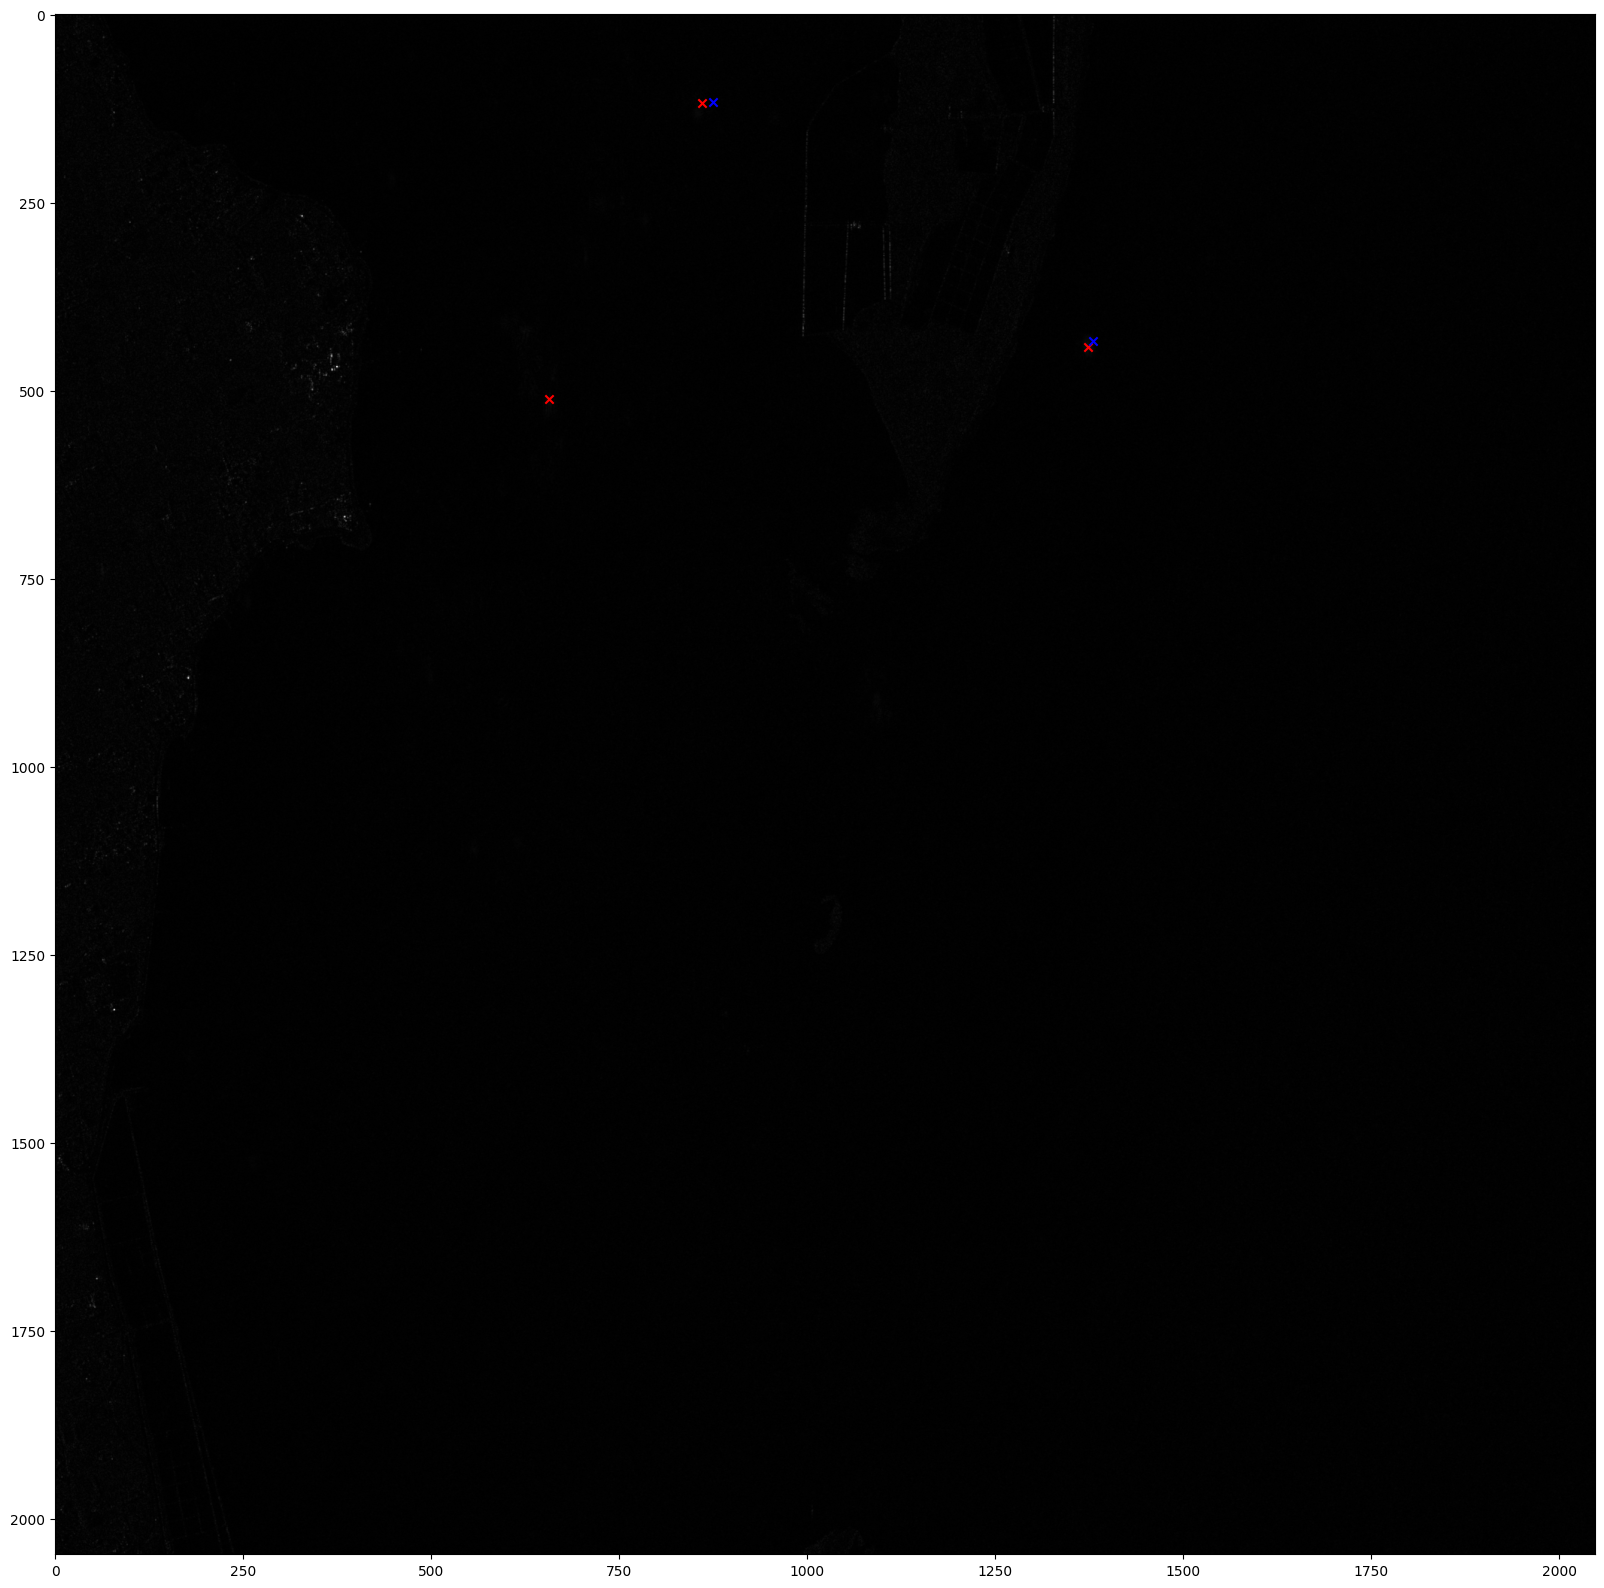

In [36]:
plt.figure(figsize=(20,20))
plt.imshow((torch.abs(img[0,0].to(torch.float) + 1j * img[0,1].to(torch.float)).cpu().numpy()), cmap='gray')
plt.scatter(target[:,0], target[:,1], marker='x', c='red')
plt.scatter(scaled_out[:,0].to(torch.float).detach().cpu().numpy(), scaled_out[:,1].to(torch.float).detach().cpu().numpy(), marker='x', c='blue')